In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.metrics import mean_squared_error, f1_score, plot_confusion_matrix, confusion_matrix

In [2]:
df = pd.read_csv('./data/cheapcleaned.csv')

In [3]:
X = df.drop(columns='wage')
y = df['wage']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [19]:
pipe = Pipeline([
    ('gb', GradientBoostingClassifier())
])
params = {
    'gb__loss': ['exponential'],
    'gb__learning_rate': [.15],
    'gb__n_estimators': [100],
    'gb__subsample': [1.0],
    'gb__min_samples_leaf':[1],
    'gb__random_state':[None]
}
gs = GridSearchCV(pipe, param_grid=params)
gs.fit(X_train, y_train)
print(gs.best_score_)
gs.best_params_

0.8572912646609729


{'gb__learning_rate': 0.15,
 'gb__loss': 'exponential',
 'gb__min_samples_leaf': 1,
 'gb__n_estimators': 100,
 'gb__random_state': None,
 'gb__subsample': 1.0}

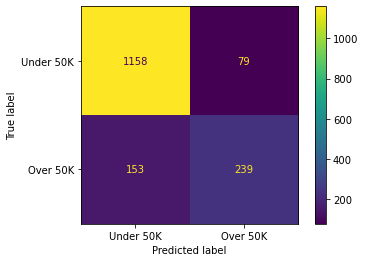

In [23]:
plot_confusion_matrix(gs, X_test, y_test, display_labels=['Under 50K', 'Over 50K'])

In [25]:
gs.fit(X_train, y_train)

Pipeline(steps=[('gb', GradientBoostingClassifier())])

In [30]:
gb_preds_train = gs.predict(X_train)
gb_preds = gs.predict(X_test)
gb_f1_train = f1_score(y_train, gb_preds_train)
gb_f1 = f1_score(y_test, gb_preds)
gb_f1_train, gb_f1

(0.7228003784295175, 0.6732394366197184)

In [29]:
from sklearn.preprocessing import StandardScaler
knn_pipe = Pipeline([
    ('ss', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

knn_params = {
    'knn__n_neighbors': [26],
    'knn__metric': ['manhattan'],
    'knn__weights': ['uniform'],
}

knn_gs = GridSearchCV(knn_pipe, param_grid=knn_params)
knn_gs.fit(X_train, y_train)
print(knn_gs.best_score_)
knn_gs.best_params_

0.8316985334832291


{'knn__metric': 'manhattan', 'knn__n_neighbors': 26, 'knn__weights': 'uniform'}

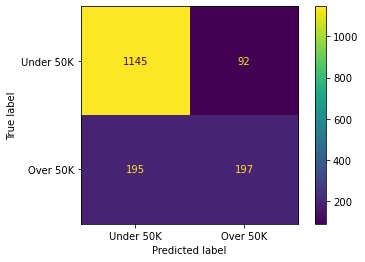

In [31]:
plot_confusion_matrix(knn_gs, X_test, y_test, display_labels=['Under 50K', 'Over 50K'])